<a href="https://colab.research.google.com/github/Griotold/google_drive/blob/main/report/ch_6_3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (주성분 분석) 
- 중요도 상
- 유튜브 보면 좋음
- 차원축소의 개념
- PCA 개념
- 과일 사진의 경우, 10,000개의 픽셀(높이 X 너비)
- 10,000개의 특성이 있는 셈
- 정형데이터에서도 활용 가능
  + 수치형 데이터 중에서 연속형 데이터만
  + 문자형 데이터와 비연속형 데이터는 안됨.
  + jjw님 캐글 대회 : 수치형 칼럼 304개
    + 연산은 RAM에서 처리
    + RAM이 과부하 

## 차원축소
- 일부 특성을 선택하여 데이터 크기를 줄인다.
- 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고(압축) 지도학습 모델의 성능을 향상 시킬 수 있는 방법이다.
- 반대로 압축한 데이터를 다시 원본 데이터로 손실을 최대한 줄이면서 복원할 수도 있다.
- 머신러닝 측면 : 과대적합 방지 & 성능 향상
- 수치형 데이터가 많을 때 사용한다.
- 문자형 데이터가 많다고 쓸 수는 없다.

## 주성분 분석(principal component analysis)
- PCA
- 가장 널리 사용되는 차원 축소 기법
- 원본 데이터의 분포를 최대한 보존하면서 고차원 공간의 데이터들을 저차원 공간으로 변환한다.
- 양적 데이터사이의 분산-공분산 관계를 이용해서 선형 결합으로 표시되는 주성분을 찾는다.
- 2~3개의 주성분으로 전체 변동을 찾는 것이 PCA
- 두 개의 독립변수 x1, x2가 있다.
- 분산이 가장 큰 방향을 찾는다. 다시 말해, 가장 데이터의 분포를 잘 표현하는 방향을 찾는다.
- 이 방향의 벡터를 주성분이라고 한다. -> pc1
- 첫 번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다. -> pc2

p.326
- 그래프를 보면, 처음 10개의 주성분이 대부분의 분산을 표현하고 있다.
- 10,000개의 픽셀이 압축된 셈.
- 10,000개로 분류를 해도 잘 되지만, 10개로 압축해서 분류했는데 오히려 분류가 더 잘 되더라. 따라서, 차원 축소를 하면 효율적이다.
- 기존에는 1시간 걸리던 것이 10분 걸린다는 소리.

## PCA 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 06:15:47--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 06:15:47--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 06:15:47--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
fruits = np.load('/content/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 주성분의 개수 50
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


- 50개의 주성분과 10,000개의 원본 데이터 특성

### 시각화

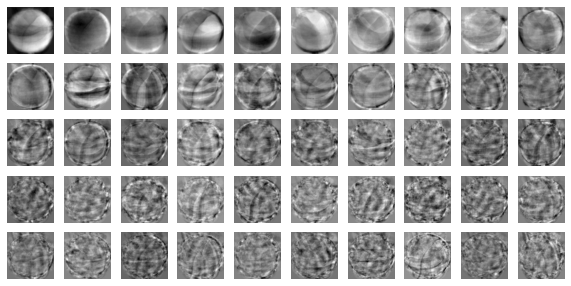

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()
    
draw_fruits(pca.components_.reshape(-1, 100, 100))

- 압축을 했기 때문에 그림이 탁해졌다.
- 그러나, 특성은 남아 있다.
- 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 이미지는 그대로 두고 10,000개에서 50개로 압축했다.
- 원본에 대비해서 1/200으로 줄임
- 용량이 줄어들었음.


## 원본 데이터 재구성
- 100% 재구성은 어렵지만, 그래도 쓸만하다.
- inverse_transform() 메서드로 복원.

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


- 복원된 데이터를 100 X 100 크기로 바꾸어 100개씩 나누어 출력한다.

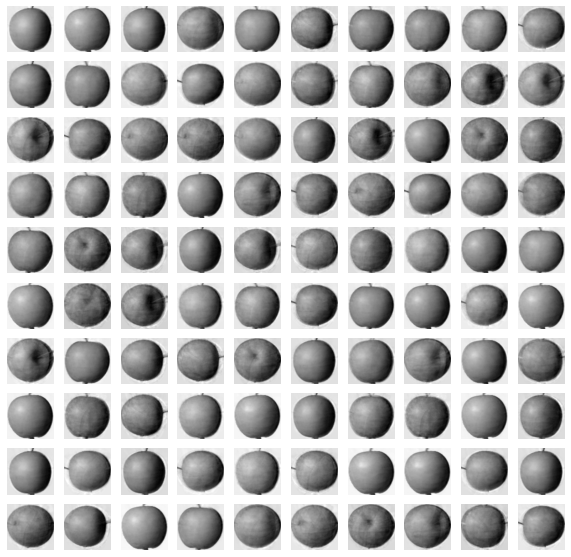

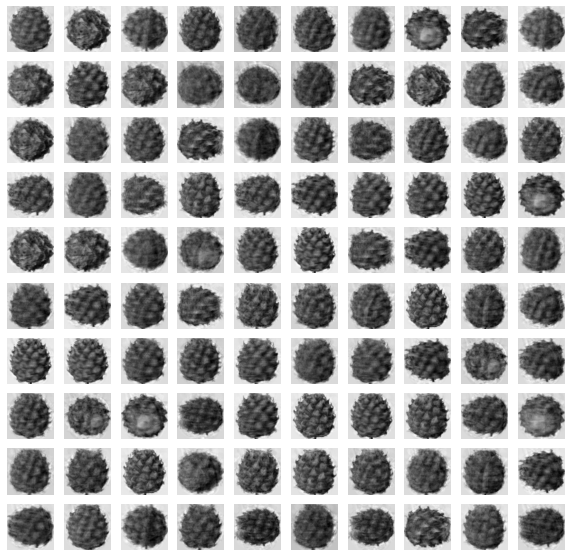

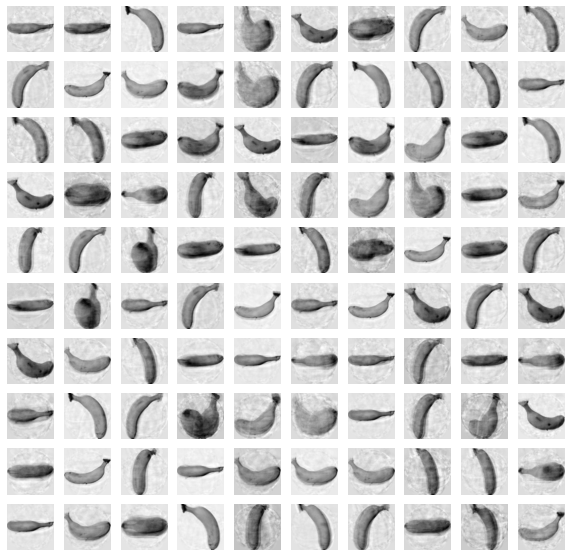

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

- 압축하고 풀었는데도 잘 복원되었다.
- 50개의 주성분이 분산을 가장 잘 보존하도록 변환되었기 때문이다.

## 설명된 분산(explained variance)
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값.
- 첫 번째 주성분이 설명된 분산 중 가장 큰 비율을 차지한다.

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9214593110740187


- 주성분이 원본 데이터의 분산을 92%나 표현하고 있다.
- 시각화로 확인해보자.

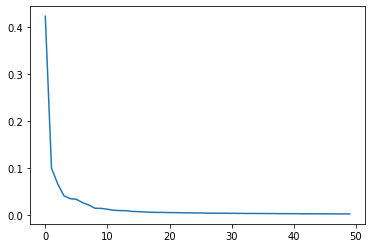

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현하고 있다.

## 다른 알고리즘과 함께 사용하기
- PCA로 축소한 데이터를 지도 학습에 적용해보자.
- 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 지도학습이니까 타깃값이 있어야 한다.
target = np.array([0]*100 + [1]*100 + [2]*100)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


### 교차검증
- PCA 진행전 원본데이터
  - 점수
  - 수행시간

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.8369969367980956


- PCA 수행 후, 학습 시간 비교

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.053530216217041016


- 1.83초에서 0.05초로 단축됐다.
- PCA로 훈련 데이터의 차원을 축소하면 저장 공간 뿐만 아니라 훈련 속도도 높일 수 있다.


### 주성분의 매개변수 개수 지정, 분산비율 지정
- 설명된 분산의 50%에 달하는 주성분을 찾기.

In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)

2


- 2개의 특성 만으로 50%을 대표한다.

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9933333333333334
0.08731651306152344


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


- 장황한 설명은 무시해도 된다.
- 반복수가 부족하다는 건데 교차 검증 결과가 좋아서 상관없다.

# 차원 축소된 데이터를 k-평균 알고리즘에 추가한다.

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


- 훈련 데이터의 차원을 줄이면 시각화에도 이점이 있다.
- 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.

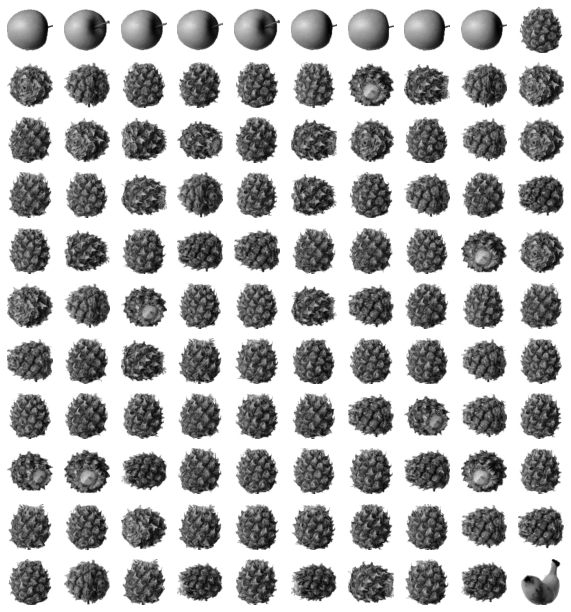

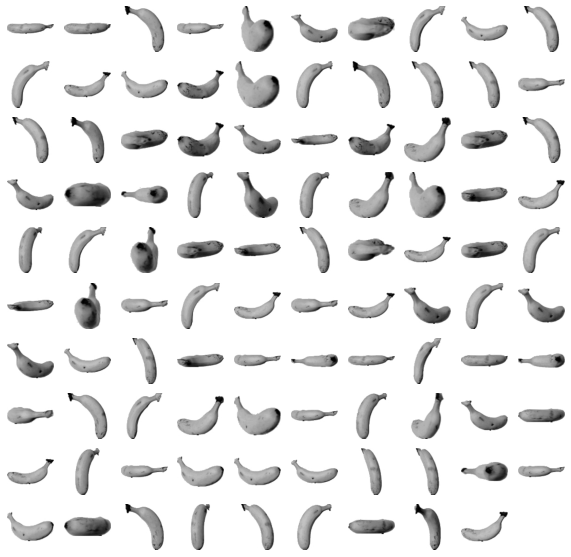

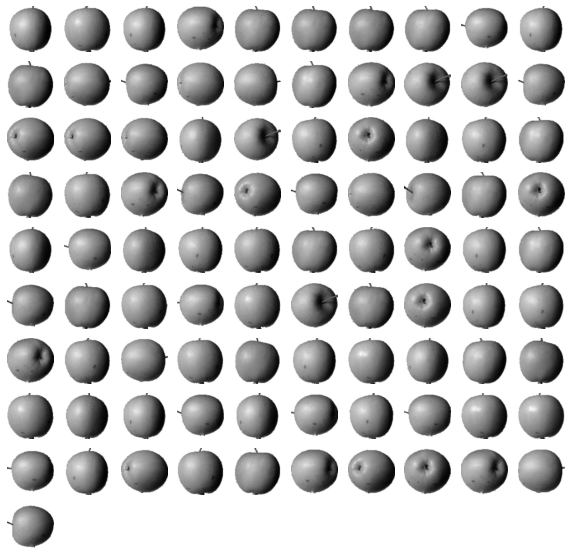

In [ ]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

### 클러스터별로 산점도 그리기

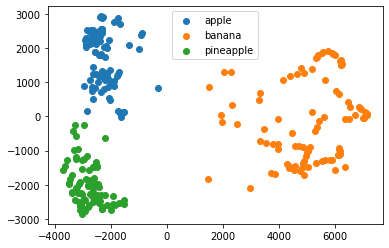

In [ ]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()